## Double Lasso - Testing the Convergence Hypothesis

Explain what is the Double Lasso Approach in a markdown cell. 

### Neyman Orthogonality Proof

# Double Lasso

The Lasso approach is useful for estimating a model with a large number of covariates relative to the number of observations. The Double Lasso method  selects the relevant covariates through two Lasso regression and an OLS one. 

Select variables by two step, finding those that predict the dependent variable and those relative to independent variable.


First we estimate the following equation where  D is our variable of interest, and W is a set of control variables.So first we implement a Lasso regression of all covariates on D, to find direct relations between covariates and D.

\begin{equation}\label{original}
Y = \alpha D + \beta 'W+ \epsilon_1 \tag{1}.
\end{equation}

A lasso regression find parameters which minimize the sum of squared errors in the regression equation with an additional penalty term which reducess the¿ose near to zero and avoid overfitting. Somethime a non-zero coeficient can be omited. to ovid that we use double Lasso. First do a lasso regression predicting the dependent variable, and keeping the variables with non-zero estimated coefficients. An then doing the same but for predicting the focal variable D. Finaly we set a linear regression of the dependent variable on the focal independent variable, including the covariates selected in either of the previous two steps.


### Replication

In [1]:
using RData, LinearAlgebra, GLM, DataFrames, Statistics, Random, Distributions, DataStructures, NamedArrays, PrettyTables
import CodecBzip2

In [2]:
using StatsModels

In [3]:
# Importing .Rdata file
growth_read = load("GrowthData.RData")

Dict{String, Any} with 1 entry:
  "GrowthData" => 90×63 DataFrame. Omitted printing of 57 columns…

In [4]:
# Since growth_read is a dictionary, we check if there is a key called "GrowthData", the one we need for our analyze
haskey(growth_read, "GrowthData")

true

In [5]:
# Now we save that dataframe with a new name
growth = growth_read["GrowthData"]
names(growth)

63-element Vector{String}:
 "Outcome"
 "intercept"
 "gdpsh465"
 "bmp1l"
 "freeop"
 "freetar"
 "h65"
 "hm65"
 "hf65"
 "p65"
 "pm65"
 "pf65"
 "s65"
 ⋮
 "secc65"
 "seccm65"
 "seccf65"
 "syr65"
 "syrm65"
 "syrf65"
 "teapri65"
 "teasec65"
 "ex1"
 "im1"
 "xr65"
 "tot1"

In [6]:
typeof(growth), size(growth)

(DataFrame, (90, 63))

In [7]:
#dimenntions of dataframe 

a = size(growth,1)
b =  size(growth,2)

print("This DataFrame has ",a, " observations (countries) and ",b," variables")

This DataFrame has 90 observations (countries) and 63 variables

In [8]:
# set variable of interest

y = growth[!, "Outcome"]
y = DataFrame([y], [:y])

,y
,Float64
1,-0.0243358
2,0.100473
3,0.0670515
4,0.0640892
5,0.0279295
6,0.0464074
7,0.0673323
8,0.0209777
9,0.0335512


In [9]:
#set the rest of the regressors

X = select(growth, Not(["Outcome"]))

,intercept,gdpsh465,bmp1l,freeop,freetar,h65,hm65,hf65,p65
,Int32,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1,6.59167,0.2837,0.153491,0.043888,0.007,0.013,0.001,0.29
2,1,6.82979,0.6141,0.313509,0.061827,0.019,0.032,0.007,0.91
3,1,8.89508,0.0,0.204244,0.009186,0.26,0.325,0.201,1.0
4,1,7.56528,0.1997,0.248714,0.03627,0.061,0.07,0.051,1.0
5,1,7.1624,0.174,0.299252,0.037367,0.017,0.027,0.007,0.82
6,1,7.21891,0.0,0.258865,0.02088,0.023,0.038,0.006,0.5
7,1,7.8536,0.0,0.182525,0.014385,0.039,0.063,0.014,0.92
8,1,7.70391,0.2776,0.215275,0.029713,0.024,0.035,0.013,0.69
9,1,9.06346,0.0,0.109614,0.002171,0.402,0.488,0.314,1.0


In [10]:
data = [y X]

,y,intercept,gdpsh465,bmp1l,freeop,freetar,h65,hm65
,Float64,Int32,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.0243358,1,6.59167,0.2837,0.153491,0.043888,0.007,0.013
2,0.100473,1,6.82979,0.6141,0.313509,0.061827,0.019,0.032
3,0.0670515,1,8.89508,0.0,0.204244,0.009186,0.26,0.325
4,0.0640892,1,7.56528,0.1997,0.248714,0.03627,0.061,0.07
5,0.0279295,1,7.1624,0.174,0.299252,0.037367,0.017,0.027
6,0.0464074,1,7.21891,0.0,0.258865,0.02088,0.023,0.038
7,0.0673323,1,7.8536,0.0,0.182525,0.014385,0.039,0.063
8,0.0209777,1,7.70391,0.2776,0.215275,0.029713,0.024,0.035
9,0.0335512,1,9.06346,0.0,0.109614,0.002171,0.402,0.488


### 1. OLS regression

In [11]:
#basic Model
reg_ols  = lm(term(:y) ~ sum(term.(names(data[!, Not(["y", "intercept"])]))), data, dropcollinear=false)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

y ~ 1 + gdpsh465 + bmp1l + freeop + freetar + h65 + hm65 + hf65 + p65 + pm65 + pf65 + s65 + sm65 + sf65 + fert65 + mort65 + lifee065 + gpop1 + fert1 + mort1 + invsh41 + geetot1 + geerec1 + gde1 + govwb1 + govsh41 + gvxdxe41 + high65 + highm65 + highf65 + highc65 + highcm65 + highcf65 + human65 + humanm65 + humanf65 + hyr65 + hyrm65 + hyrf65 + no65 + nom65 + nof65 + pinstab1 + pop65 + worker65 + pop1565 + pop6565 + sec65 + secm65 + secf65 + secc65 + seccm65 + seccf65 + syr65 + syrm65 + syrf65 + teapri65 + teasec65 + ex1 + im1 + xr65 + tot1

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────
                    Coef.    Std. Error      t  Pr(>|t|)      Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.247161   

In [12]:
#basic model Function

basic = @formula Outcome ~ gdpsh465 + bmp1l + freeop + freetar + h65 + hm65 + hf65 + p65 + pm65 + pf65 + s65 + sm65 + sf65 +
    fert65 + mort65 + lifee065 + gpop1 + fert1 + mort1 + invsh41 + geetot1 + geerec1 + gde1 + govwb1 + govsh41 + gvxdxe41 + 
    high65 + highm65 + highf65 + highc65 + highcm65 + highcf65 + human65 + humanm65 + humanf65 + hyr65 + hyrm65 + hyrf65 + 
    no65 + nom65 + nof65 + pinstab1 + pop65 + worker65 + pop1565 + pop6565 + sec65 + secm65 + secf65 + secc65 + seccm65 + 
    seccf65 + syr65 + syrm65 + syrf65 + teapri65 + teasec65 + ex1 + im1 + xr65 + tot1

basic_results = lm(basic,growth,dropcollinear=false)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

Outcome ~ 1 + gdpsh465 + bmp1l + freeop + freetar + h65 + hm65 + hf65 + p65 + pm65 + pf65 + s65 + sm65 + sf65 + fert65 + mort65 + lifee065 + gpop1 + fert1 + mort1 + invsh41 + geetot1 + geerec1 + gde1 + govwb1 + govsh41 + gvxdxe41 + high65 + highm65 + highf65 + highc65 + highcm65 + highcf65 + human65 + humanm65 + humanf65 + hyr65 + hyrm65 + hyrf65 + no65 + nom65 + nof65 + pinstab1 + pop65 + worker65 + pop1565 + pop6565 + sec65 + secm65 + secf65 + secc65 + seccm65 + seccf65 + syr65 + syrm65 + syrf65 + teapri65 + teasec65 + ex1 + im1 + xr65 + tot1

Coefficients:
─────────────────────────────────────────────────────────────────────────────────────
                    Coef.    Std. Error      t  Pr(>|t|)      Lower 95%     Upper 95%
─────────────────────────────────────────────────────────────────────────────────────
(Intercept)   0.247

In [13]:
# output: estimated regression coefficient corresponding to the target regressor
est_ols = coef(reg_ols)[2]

# output: std. error
std_ols = stderror(reg_ols)[2]

# output: 95% confidence interval
lower_ci = coeftable(reg_ols).cols[5][2]
upper_ci = coeftable(reg_ols).cols[6][2]

0.05184424331685134

#### OLS Summary

In [14]:
table_1 = NamedArray(zeros(1, 4))
setnames!(table_1, ["OLS"], 1)
table_1

1×4 Named Matrix{Float64}
A ╲ B │   1    2    3    4
──────┼───────────────────
OLS   │ 0.0  0.0  0.0  0.0

In [15]:
table_1[1] = est_ols
table_1[2] = std_ols   
table_1[3] = lower_ci
table_1[4] = upper_ci    
 
table_1

1×4 Named Matrix{Float64}
A ╲ B │           1            2            3            4
──────┼───────────────────────────────────────────────────
OLS   │ -0.00937799    0.0298877   -0.0706002    0.0518442

In [16]:
table_1_pandas = DataFrame( table_1, [ :"Estimator", :"Std. Error", :"lower bound CI", :"upper bound CI"])
model_1 = DataFrame(model = ["OLS"])
table_1_pandas = hcat(model_1,table_1_pandas)
table_1_pandas

,model,Estimator,Std. Error,lower bound CI,upper bound CI
,String,Float64,Float64,Float64,Float64
1,OLS,-0.00937799,0.0298877,-0.0706002,0.0518442


In [17]:
header = (["Model", "Estimator", "Std. Error", "lower bound CI", "upper bound CI"])
pretty_table(table_1_pandas; backend = Val(:html), header = header, formatters=ft_round(6), alignment=:c)

#The Confidence Interval includes zero. we can´t jump into conlcusions.

Model,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.0706,0.051844


### 2. Double LASSO using cross Validation

In [18]:
using Lasso, GLM

In [19]:
# Create main variables
Y = growth[!, "Outcome"]
Y = DataFrame([Y], [:Y])
D = growth[!, "gdpsh465"]
D = DataFrame([D], [:D])
W = select(growth, Not(["Outcome", "intercept", "gdpsh465"]))
data = [Y D W]

,Y,D,bmp1l,freeop,freetar,h65,hm65,hf65,p65
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.0243358,6.59167,0.2837,0.153491,0.043888,0.007,0.013,0.001,0.29
2,0.100473,6.82979,0.6141,0.313509,0.061827,0.019,0.032,0.007,0.91
3,0.0670515,8.89508,0.0,0.204244,0.009186,0.26,0.325,0.201,1.0
4,0.0640892,7.56528,0.1997,0.248714,0.03627,0.061,0.07,0.051,1.0
5,0.0279295,7.1624,0.174,0.299252,0.037367,0.017,0.027,0.007,0.82
6,0.0464074,7.21891,0.0,0.258865,0.02088,0.023,0.038,0.006,0.5
7,0.0673323,7.8536,0.0,0.182525,0.014385,0.039,0.063,0.014,0.92
8,0.0209777,7.70391,0.2776,0.215275,0.029713,0.024,0.035,0.013,0.69
9,0.0335512,9.06346,0.0,0.109614,0.002171,0.402,0.488,0.314,1.0


Data Splitting

In [20]:
using Random
using Pkg
Random.seed!(3)

TaskLocalRNG()

In [21]:
# By default we split the data in 5 folds.

data_comp_random = growth[shuffle(1:nrow(data)),:];
a = floor(nrow(data_comp_random)*4/5)
b = floor(nrow(data_comp_random)*1/5)
print("# observations train sample: ",a)
print("\n# observations test sample: ",b)
train = data_comp_random[1:72,:]
test = data_comp_random[73:end,:]


# Create main variables for training sample 
Y_t = train[!, "Outcome"]
Y_t = DataFrame([Y_t], [:Y_t])
D_t = train[!, "gdpsh465"]
D_t = DataFrame([D_t], [:D_t])
W_t = select(train, Not(["Outcome", "intercept", "gdpsh465"]))
data_t = [Y_t D_t W_t]

# Create main variables for test sample 
Y_s = test[!, "Outcome"]
Y_s = DataFrame([Y_s], [:Y_s])
D_s = test[!, "gdpsh465"]
D_s = DataFrame([D_s], [:D_s])
W_s = select(test, Not(["Outcome", "intercept", "gdpsh465"]))
data_s = [Y_s D_s W_s]

# observations train sample: 72.0
# observations test sample: 18.0

,Y_s,D_s,bmp1l,freeop,freetar,h65,hm65,hf65,p65
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,-0.0639929,6.20456,0.3723,0.2037,0.058091,0.011,0.018,0.003,0.71
2,0.0652286,7.17549,0.0,0.179933,0.046376,0.035,0.04,0.027,0.83
3,0.0118973,7.80832,0.1756,0.215275,0.029713,0.083,0.112,0.058,0.82
4,-0.10099,8.49862,0.001,0.189867,0.031747,0.181,0.19,0.159,0.97
5,0.141445,7.51152,0.1053,0.228424,0.029328,0.103,0.139,0.054,1.0
6,0.0654911,8.78232,0.0,0.16721,0.003311,0.246,0.331,0.16,0.99
7,0.0406415,8.91234,0.0,0.150366,0.024377,0.257,0.338,0.215,1.0
8,0.0946182,8.4145,0.0,0.374328,0.0,0.101,0.147,0.053,1.0
9,0.109699,7.17702,0.0178,0.18524,0.015453,0.02,0.026,0.013,0.9


In [37]:
# Seat values for Lasso Train

lasso_model_t = fit(LassoModel, term(:Y_t) ~  sum(term.(names(data_t[!, Not(["Y_t", "D_t"])]))), data_t; α = 0.00077)
r_Y_t = residuals(lasso_model_t)
r_Y_t = DataFrame([r_Y_t], [:r_Y_t])

# Part. out d

lasso_model_t = fit(LassoModel, term(:D_t) ~  sum(term.(names(data_t[!, Not(["Y_t", "D_t"])]))), data_t;  α = 0.00077)
r_D_t = residuals(lasso_model_t)
r_D_t = DataFrame([r_D_t], [:r_D_t])

# ols 
data_aux1 = [r_Y_t r_D_t]
fm_1 = @formula(r_Y_t ~ r_D_t)
partial_lasso_fit = lm(fm_1, data_aux1)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

r_Y_t ~ 1 + r_D_t

Coefficients:
──────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error      t  Pr(>|t|)    Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  -2.44346e-17  0.00507556  -0.00    1.0000  -0.0101229   0.0101229
r_D_t         0.0042931    0.00565451   0.76    0.4503  -0.00698446  0.0155707
──────────────────────────────────────────────────────────────────────────────

In [23]:
# Seat values for Lasso Test

lasso_model_s = fit(LassoModel, term(:Y_s) ~  sum(term.(names(data_s[!, Not(["Y_s", "D_s"])]))), data_s; α = 0.00077)
r_Y_s = residuals(lasso_model)
r_Y_s = DataFrame([r_Y_s], [:r_Y_s])

# Part. out d

lasso_model_s = fit(LassoModel, term(:D_s) ~  sum(term.(names(data_s[!, Not(["Y_s", "D_s"])]))), data_s;  α = 0.00077)
r_D_s = residuals(lasso_model)
r_D_s = DataFrame([r_D_s], [:r_D_s])

# ols 
data_aux2 = [r_Y_s r_D_s]
fm_1 = @formula(r_Y_s ~ r_D_s)
partial_lasso_fit = lm(fm_1, data_aux2)

LoadError: BoundsError: attempt to access 36×60 Matrix{Float64} at index [37, 6]

In [24]:
#Basic model using Lasso with TRAIN data
basic_model_lasso_train=fit(LassoModel,basic,train)

StatsModels.TableRegressionModel{LassoModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}}}}, MinAICc}, Matrix{Float64}}

Outcome ~ gdpsh465 + bmp1l + freeop + freetar + h65 + hm65 + hf65 + p65 + pm65 + pf65 + s65 + sm65 + sf65 + fert65 + mort65 + lifee065 + gpop1 + fert1 + mort1 + invsh41 + geetot1 + geerec1 + gde1 + govwb1 + govsh41 + gvxdxe41 + high65 + highm65 + highf65 + highc65 + highcm65 + highcf65 + human65 + humanm65 + humanf65 + hyr65 + hyrm65 + hyrf65 + no65 + nom65 + nof65 + pinstab1 + pop65 + worker65 + pop1565 + pop6565 + sec65 + secm65 + secf65 + secc65 + seccm65 + seccf65 + syr65 + syrm65 + syrf65 + teapri65 + teasec65 + ex1 + im1 + xr65 + tot1

Coefficients:
LassoModel using MinAICc(2) segment of the regularization path.

Coefficients:
─────────────────
         Estimate
─────────────────
x1    0.228153
x2   -0.0234331
x3   -0.0697234
x4    0.0
x5    0.0
x6    0.0
x7    0.0
x8   -0.111508
x9    0.0
x10   0.

In [25]:
basic_model_lasso_train_e = sum(residuals(basic_model_lasso_train).^2)
basic_model_lasso_train_p = sum(predict(basic_model_lasso_train).^2)
basic_model_lasso_train_r2 =basic_model_lasso_train_p /(basic_model_lasso_train_e + basic_model_lasso_train_p)

print("BASIC MODEL Train:","\n")
print("R2: ",basic_model_lasso_train_r2,",","\n")
print("MSE: ",basic_model_lasso_train_e)

BASIC MODEL Train:
R2: 0.7958906570383271,
MSE: 0.05357588861644463

In [26]:
#Basic model using Lasso with TEST data

basic_model_lasso_test=fit(LassoModel,basic,test)

StatsModels.TableRegressionModel{LassoModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}}}}, MinAICc}, Matrix{Float64}}

Outcome ~ gdpsh465 + bmp1l + freeop + freetar + h65 + hm65 + hf65 + p65 + pm65 + pf65 + s65 + sm65 + sf65 + fert65 + mort65 + lifee065 + gpop1 + fert1 + mort1 + invsh41 + geetot1 + geerec1 + gde1 + govwb1 + govsh41 + gvxdxe41 + high65 + highm65 + highf65 + highc65 + highcm65 + highcf65 + human65 + humanm65 + humanf65 + hyr65 + hyrm65 + hyrf65 + no65 + nom65 + nof65 + pinstab1 + pop65 + worker65 + pop1565 + pop6565 + sec65 + secm65 + secf65 + secc65 + seccm65 + seccf65 + syr65 + syrm65 + syrf65 + teapri65 + teasec65 + ex1 + im1 + xr65 + tot1

Coefficients:
LassoModel using MinAICc(2) segment of the regularization path.

Coefficients:
─────────────
     Estimate
─────────────
x1   0.039671
x2   0.0
x3   0.0
x4   0.0
x5   0.0
x6   0.0
x7   0.0
x8   0.0
x9   0.0
x10  0.0
x11  0.0
x12  0.0
x13  0.0
x14  0.0
x

In [27]:
basic_model_lasso_test_e = sum(residuals(basic_model_lasso_test).^2)
basic_model_lasso_test_p = sum(predict(basic_model_lasso_test).^2)
basic_model_lasso_test_r2 =basic_model_lasso_test_p /(basic_model_lasso_test_e + basic_model_lasso_test_p)

print("BASIC MODEL","\n")
print("R2: ",basic_model_lasso_test_r2,",","\n")
print("MSE: ",basic_model_lasso_test_e)


BASIC MODEL
R2: 0.2161695052605391,
MSE: 0.10271798737333554

### 3. Double Lasso using theoretical Lambda (HDM package)

In [28]:
include("hdmjl.jl")

In [29]:
res_Y_0 = rlasso_arg( W, Y, nothing, true, true, true, false, false, 
                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )

rlasso_arg(90×60 DataFrame. Omitted printing of 53 columns
│ Row │ bmp1l   │ freeop   │ freetar  │ h65     │ hm65    │ hf65    │ p65     │
│     │ Float64 │ Float64  │ Float64  │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼─────────┼──────────┼──────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 0.2837  │ 0.153491 │ 0.043888 │ 0.007   │ 0.013   │ 0.001   │ 0.29    │
│ 2   │ 0.6141  │ 0.313509 │ 0.061827 │ 0.019   │ 0.032   │ 0.007   │ 0.91    │
│ 3   │ 0.0     │ 0.204244 │ 0.009186 │ 0.26    │ 0.325   │ 0.201   │ 1.0     │
│ 4   │ 0.1997  │ 0.248714 │ 0.03627  │ 0.061   │ 0.07    │ 0.051   │ 1.0     │
│ 5   │ 0.174   │ 0.299252 │ 0.037367 │ 0.017   │ 0.027   │ 0.007   │ 0.82    │
│ 6   │ 0.0     │ 0.258865 │ 0.02088  │ 0.023   │ 0.038   │ 0.006   │ 0.5     │
│ 7   │ 0.0     │ 0.182525 │ 0.014385 │ 0.039   │ 0.063   │ 0.014   │ 0.92    │
│ 8   │ 0.2776  │ 0.215275 │ 0.029713 │ 0.024   │ 0.035   │ 0.013   │ 0.69    │
│ 9   │ 0.0     │ 0.109614 │ 0.002171 │ 0.402   │ 0.488   │ 0

In [30]:
# res_Y = rlasso(res_Y_0)
# res_Y = res_Y["residuals"]
# res_D_0 = rlasso_arg( W, D, nothing, true, true, true, false, false, 
#                    nothing, 1.1, nothing, 5000, 15, 10^(-5), -Inf, true, Inf, true )
#res_D = rlasso(res_D_0)["residuals"]
# We need to convert the vector into matrix because the lm function requires "X" to be matrix 
#res_D = reshape(res_D, length(res_D), 1)
#reg3 = lm(res_D, res_Y)

### 4. Double Lasso using method="partialling out"

In [31]:
# Seat values for Lasso

lasso_model = fit(LassoModel, term(:Y) ~  sum(term.(names(data[!, Not(["Y", "D"])]))), data; α = 0.8)
r_Y = residuals(lasso_model)
r_Y = DataFrame([r_Y], [:r_Y])

# Part. out d

lasso_model = fit(LassoModel, term(:D) ~  sum(term.(names(data[!, Not(["Y", "D"])]))), data;  α = 0.8)
r_D = residuals(lasso_model)
r_D = DataFrame([r_D], [:r_D])

# ols 
data_aux = [r_Y r_D]
fm_1 = @formula(r_Y ~ r_D)
partial_lasso_fit = lm(fm_1, data_aux)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

r_Y ~ 1 + r_D

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error      t  Pr(>|t|)    Lower 95%    Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)  -2.69696e-17  0.00417979  -0.00    1.0000  -0.00830646   0.00830646
r_D          -0.0500007    0.0152165   -3.29    0.0015  -0.0802403   -0.0197611
────────────────────────────────────────────────────────────────────────────────

In [32]:
# output: estimated regression coefficient corresponding to the target regressor
est_lasso = coef(partial_lasso_fit)[2]

# output: std. error
std_lasso = stderror(partial_lasso_fit)[2]

# output: 95% confidence interval
lower_ci_lasso = coeftable(partial_lasso_fit).cols[5][2]
upper_ci_lasso = coeftable(partial_lasso_fit).cols[6][2]

-0.019761084189004997

In [33]:
# Regress residuales
partial_lasso_fit = lm(fm_1, data_aux)
partial_lasso_est = coef(partial_lasso_fit)[2]

println("Coefficient for D via partialling-out using lasso is: ", partial_lasso_est )

Coefficient for D via partialling-out using lasso is: -0.05000069917512768


In [34]:
# Summary

In [35]:
table_2 = NamedArray(zeros(1, 4))
setnames!(table_2, ["DOUBLE LASSO"], 1)

table_2[1] = est_lasso
table_2[2] = std_lasso   
table_2[3] = lower_ci_lasso
table_2[4] = upper_ci_lasso    
 
table_2_pandas = DataFrame( table_2, [ :"Estimator", :"Std. Error", :"lower bound CI", :"upper bound CI"])
model_2 = DataFrame(model = ["DOUBLE LASSO"])
table_2_pandas = hcat(model_2,table_2_pandas)

header = (["Model", "Estimator", "Std. Error", "lower bound CI", "upper bound CI"])
pretty_table(table_2_pandas; backend = Val(:html), header = header, formatters=ft_round(6), alignment=:c)

Model,Estimator,Std. Error,lower bound CI,upper bound CI
DOUBLE LASSO,-0.050001,0.015217,-0.08024,-0.019761


In [36]:
table_3 = vcat(table_1, table_2)
setnames!(table_3, ["OLS", "DOUBLE LASSO"], 1)

table_3_pandas = DataFrame( table_3, [ :"Estimator", :"Std. Error", :"lower bound CI", :"upper bound CI"])
model_3 = DataFrame(model = ["OLS", "DOUBLE LASSO"])
table_3_pandas = hcat(model_3, table_3_pandas)

header = (["Model", "Estimator", "Std. Error", "lower bound CI", "upper bound CI"])
pretty_table(table_3_pandas; backend = Val(:html), header = header, formatters=ft_round(6), alignment=:c)

Model,Estimator,Std. Error,lower bound CI,upper bound CI
OLS,-0.009378,0.029888,-0.0706,0.051844
DOUBLE LASSO,-0.050001,0.015217,-0.08024,-0.019761


### Plots

In [39]:
using Plots

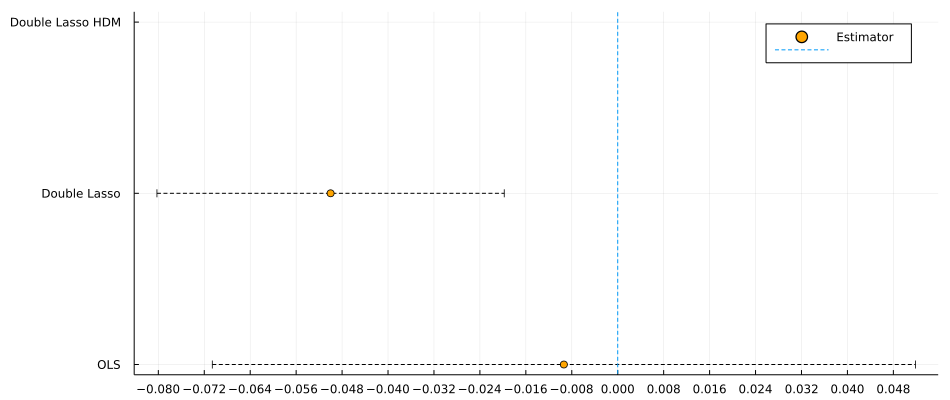

In [40]:
xerror = table_3_pandas[!,2] .- table_3_pandas[!,4]
scatter(table_3_pandas[!,2], ["OLS", "Double Lasso", "Double Lasso HDM"], label = "Estimator", xerrors = xerror, 
        xtick = -1:0.008:1, linestyle = :dash, seriescolor=:orange)
plot!(size=(950,400))
plot!([0], seriestype="vline", linestyle = :dash, color = 1, label = " ")